# Лабораторна робота №1
### "Розв’язання нелінійних рівнянь"
### Самарука Владислав Володимировича


![img1.png](attachment:c5dcf057-3517-49d3-82b5-b0b5ae5c8188.png)



In [84]:
import math
import matplotlib.pyplot as plt
import numpy as np

a, b = 0, 1
epsilon = 1e-4
initial_guess_iteration = 0.5

def f(x):
    """Функція, яку ми шукаємо корінь."""
    return 3 * x**2 - np.cos(np.pi * x)**2

def f_prime(x):
    """Похідна функції f(x)."""
    return 6 * x + 2 * math.pi * math.sin(math.pi * x) * math.pi

def g(x):
    """Функція для методу простої ітерації."""
    return x - f(x) / f_prime(x)

In [85]:
def calculate_a_priori_estimate(a, b, epsilon):
    """Обчислення апріорної оцінки кількості кроків."""
    return math.log2((b - a) / epsilon)

In [86]:
def calculate_a_posteriori_estimate(x, epsilon):
    """Обчислення апостеріорної оцінки кількості кроків."""
    return math.log2(epsilon / abs(f(x)))

In [87]:

def bisection_method(a, b, epsilon):
    """Метод дихотомії."""
    steps = 0
    while (b - a) / 2 > epsilon:
        c = (a + b) / 2
        if f(c) == 0:
            break
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        steps += 1
    return (a + b) / 2, steps

In [88]:
def fixed_point_iteration(initial_guess, epsilon, max_iterations=1000):
    """Метод простої ітерації."""
    x = initial_guess
    steps = 0
    while abs(x - g(x)) > epsilon and steps < max_iterations:
        x = g(x)
        steps += 1
    return x, steps

In [89]:
def newton_method(initial_guess, epsilon):
    """Метод Ньютона."""
    x = initial_guess
    steps = 0
    while abs(f(x)) > epsilon:
        x = x - f(x) / f_prime(x)
        steps += 1
    return x, steps

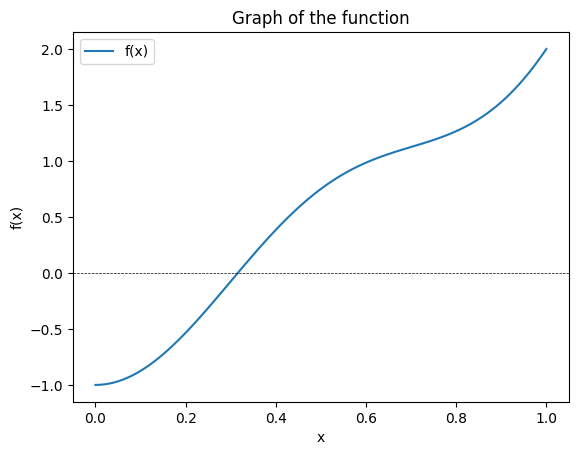

In [90]:
def plot_function():
    x_values = np.linspace(0, 1, 100)
    y_values = f(x_values)

    plt.plot(x_values, y_values, label='f(x)')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Graph of the function')
    plt.legend()
    plt.show()
plot_function()

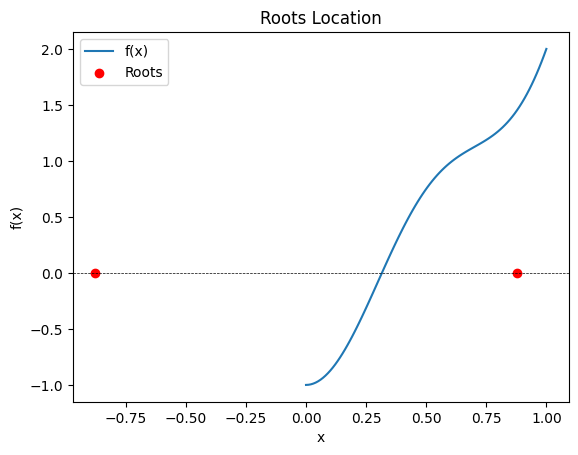

In [91]:
def plot_roots_location():
    x_values = np.linspace(0, 1, 100)
    y_values = f(x_values)

    plt.plot(x_values, y_values, label='f(x)')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

    # Визначення місця розташування коренів
    roots = np.roots([3, 0, -1, 0, -1])
    real_roots = roots[np.isreal(roots)].real  # Вибираємо реальні частини коренів
    plt.scatter(real_roots, np.zeros_like(real_roots), color='red', label='Roots')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Roots Location')
    plt.legend()
    plt.show()
plot_roots_location()

In [92]:
# Викликаємо метод дихотомії
result_bisection, steps_bisection = bisection_method(a, b, epsilon)
a_priori_estimate_bisection = calculate_a_priori_estimate(a, b, epsilon)
a_posteriori_estimate_bisection = calculate_a_posteriori_estimate(result_bisection, epsilon)

print(f"\nBisection method result: {result_bisection}, steps: {steps_bisection}")
print(f"A priori estimate: {a_priori_estimate_bisection}")
print(f"A posteriori estimate: {a_posteriori_estimate_bisection}")

# Викликаємо метод Ньютона
result_newton, steps_newton = newton_method(initial_guess_iteration, epsilon)
a_priori_estimate_newton = calculate_a_priori_estimate(a, b, epsilon)
a_posteriori_estimate_newton = calculate_a_posteriori_estimate(result_newton, epsilon)

print(f"\nNewton method result: {result_newton}, steps: {steps_newton}")
print(f"A priori estimate: {a_priori_estimate_newton}")
print(f"A posteriori estimate: {a_posteriori_estimate_newton}")

# Викликаємо метод простої ітерації
result_iteration, steps_iteration = fixed_point_iteration(initial_guess_iteration, epsilon)
a_priori_estimate_iteration = calculate_a_priori_estimate(a, b, epsilon)
a_posteriori_estimate_iteration = calculate_a_posteriori_estimate(result_iteration, epsilon)

print(f"\nFixed-point iteration result: {result_iteration}, steps: {steps_iteration}")
print(f"A priori estimate: {a_priori_estimate_iteration}")
print(f"A posteriori estimate: {a_posteriori_estimate_iteration}")


Bisection method result: 0.31573486328125, steps: 13
A priori estimate: 13.287712379549449
A posteriori estimate: -1.2862970118300436

Newton method result: 0.3158025382408165, steps: 33
A priori estimate: 13.287712379549449
A posteriori estimate: 0.339569964058333

Fixed-point iteration result: 0.31611773372138496, steps: 23
A priori estimate: 13.287712379549449
A posteriori estimate: -3.9845428282747237
